# 1. Multivariate regression
In most of the real life use cases there will be more than one independent variable, so the concept of having multiple independent variables is called as multivariate regression. The equation takes the form: \\(y=m_1x_1+m_2x_2+m_3x_3+...+m_nx_n\\), where each independent variable is represented by *x*’s, and *m*’s are the corresponding coefficients. 

## Exercise 1: Import needed modules

In [21]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
from sklearn.model_selection import train_test_split

%matplotlib inline

**Question:**
1. For what purpose were each of these modules imported?

**Answer:**

## Exercise 2: Input data
We'll be using the housing data from the **Housing_Modified.csv** file. The housing data contains sales prices of houses in the city of Windsor. Below is the brief description about each variables.
- price: sale price of a house
- lotsize: the lot size of a property in square feet
- bedrooms: number of bedrooms
- bathrms: number of full bathrooms
- stories: number of stories excluding basement
- driveway: does the house has a driveway ?
- recroom: does the house has a recreational room ?
- fullbase: does the house has a full finished basement ?
- gashw: does the house uses gas for hot water heating ?
- airco: does the house has central air conditioning ?
- garagepl: number of garage places
- prefarea: is the house located in the preferred neighbourhood of the city ?

In [22]:
# Load data
df = pd.read_csv('Housing_Modified.csv')
print(df.head())

     price  lotsize  bedrooms  bathrms stories driveway recroom fullbase  \
0  42000.0     5850         3        1     two      yes      no      yes   
1  38500.0     4000         2        1     one      yes      no       no   
2  49500.0     3060         3        1     one      yes      no       no   
3  60500.0     6650         3        1     two      yes     yes       no   
4  61000.0     6360         2        1     one      yes      no       no   

  gashw airco  garagepl prefarea  
0    no    no         1       no  
1    no    no         0       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no  


**Questions:**
1. On what scales the individual variables are measured?
2. Which variables in their original form are not suitable for the model? Justify your answer.

**Answers:**

## Exercise 3: Data preprocessing
Several variables will be converted before the model is built. We will use for this purpose the **LabelBinarizer** class and **get_dummies()** function.

In [23]:
# Convert binary fields to numeric boolean fields
lb = preprocessing.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

df.head()

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,1,0,1,0,0,1,0
1,38500.0,4000,2,1,one,1,0,0,0,0,0,0
2,49500.0,3060,3,1,one,1,0,0,0,0,0,0
3,60500.0,6650,3,1,two,1,1,0,0,0,0,0
4,61000.0,6360,2,1,one,1,0,0,0,0,0,0


In [24]:
# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix = 'stories', drop_first = True)

# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis = 1)
del df['stories']
df.head()

,price,lotsize,bedrooms,bathrms,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea,stories_one,stories_three,stories_two
0,42000.0,5850,3,1,1,0,1,0,0,1,0,0,0,1
1,38500.0,4000,2,1,1,0,0,0,0,0,0,1,0,0
2,49500.0,3060,3,1,1,0,0,0,0,0,0,1,0,0
3,60500.0,6650,3,1,1,1,0,0,0,0,0,0,0,1
4,61000.0,6360,2,1,1,0,0,0,0,0,0,1,0,0


**Questions:**
1. What is the result of using the **LabelBinarizer** class?
2. What is the result of using the **get_dummies()** function?

**Answers:**

## Exercise 4: Correlation plot

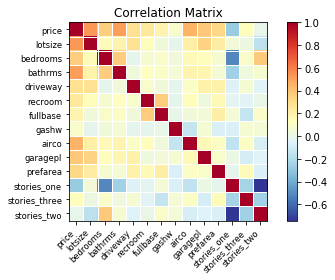

                  price   lotsize  bedrooms   bathrms  driveway   recroom  \
price          1.000000  0.535796  0.366447  0.516719  0.297167  0.254960   
lotsize        0.535796  1.000000  0.151851  0.193833  0.288778  0.140327   
bedrooms       0.366447  0.151851  1.000000  0.373769 -0.011996  0.080492   
bathrms        0.516719  0.193833  0.373769  1.000000  0.041955  0.126892   
driveway       0.297167  0.288778 -0.011996  0.041955  1.000000  0.091959   
recroom        0.254960  0.140327  0.080492  0.126892  0.091959  1.000000   
fullbase       0.186218  0.047487  0.097201  0.102791  0.043428  0.372434   
gashw          0.092837 -0.009201  0.046028  0.067365 -0.011942 -0.010119   
airco          0.453347  0.221765  0.160412  0.184955  0.106290  0.136626   
garagepl       0.383302  0.352872  0.139117  0.178178  0.203682  0.038122   
prefarea       0.329074  0.234782  0.078953  0.064013  0.199378  0.161292   
stories_one   -0.270058  0.054348 -0.509974 -0.250784 -0.053249 -0.022632   

In [25]:
# Let's plot correlation matrix using statmodels graphics packages's plot_corr()
corr = df.corr()
sm.graphics.plot_corr(corr, xnames = list(corr.columns))
plt.show()

print(corr)

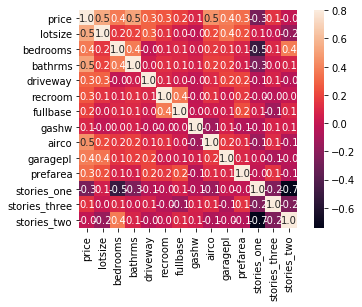

In [26]:
# Alternatively we can use seaborn package
import seaborn as sns

sns.heatmap(df.corr(), vmax = .8, square = True, annot = True, fmt = '.1f')
plt.show()

**Questions:**
1. What are the 3 pairs of variables most strongly correlated with each other? What are their correlation coefficients?
2. Which correlation plot do you think is more convenient to use and why?

**Answers:**

## Exercise 5: Variation Inflation Factor
VIF value of greater than 10 is a indicator of multicollinearity, and these variables should be excluded from the regression model.

In [27]:
# Create a Python list of feature names
independent_variables = ['lotsize', 'bedrooms', 'bathrms','driveway', 'recroom',
                         'fullbase','gashw','airco','garagepl', 'prefarea',
                        'stories_one','stories_two','stories_three']

# Use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']

thresh = 10

for i in np.arange(0, len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values, ix) for ix in range(X[independent_variables].shape[1])]
    maxloc = vif.index(max(vif))
    if max(vif) > thresh:
        print('vif:', vif)
        print('dropping \'' + X[independent_variables].columns[maxloc] + '\' at index: ' + str(maxloc))
        del independent_variables[maxloc]
    else:
        break

print('Final variables:', independent_variables)

vif: [8.958098087844336, 18.469878559519948, 8.984672347290864, 7.088578542091886, 1.4770152815033917, 2.013320236472386, 1.1034879198994196, 1.7567462065609025, 1.9826489313438442, 1.5332946465459896, 3.965752674786861, 5.511702408354892, 1.7700402770614867]
dropping 'bedrooms' at index: 1
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_two', 'stories_three']


**Questions:**
1. Which variable was removed from the data set? What was its VIF value?

**Answers:**

## Exercise 6: Create a model
We split the data into train/test of 80/20 percent respectively.

In [28]:
# Use the list to select a subset from original DataFrame
X = df[independent_variables]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state = 1)

# Create a fitted model
lm = sm.OLS(y_train, X_train).fit()

# Print the summary
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              731.3
Date:                Sun, 06 Dec 2020   Prob (F-statistic):                   1.46e-274
Time:                        00:09:14   Log-Likelihood:                         -4828.1
No. Observations:                 436   AIC:                                      9680.
Df Residuals:                     424   BIC:                                      9729.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

## Exercise 7: Evaluate a model

In [31]:
# Make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
y_pred = lm.predict(X) # full data
print('\nTrain MAE: ', metrics.mean_absolute_error(y_train, y_train_pred))
print('Train RMSE: ', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print('\nTest MAE: ', metrics.mean_absolute_error(y_test, y_test_pred))
print('Test RMSE: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print('\nFull Data MAE: ', metrics.mean_absolute_error(y, y_pred))
print('Full Data RMSE: ', np.sqrt(metrics.mean_squared_error(y, y_pred)))


Train MAE:  11987.660160035877
Train RMSE:  15593.474917800835

Test MAE:  12722.079675396284
Test RMSE:  17509.25004003038

Full Data MAE:  12135.620135657937
Full Data RMSE:  15997.901569773376


**Question:**
1. What conclusions can you draw from the MEA and RMSE values for the training, test and full datasets?

**Answer:**

## Exercise 8: Outliers
We will plot normalized residual vs leverage to understand the outlier points. Remember that **residual** is a difference between the actual and predicted value. **Leverage** is a measure of how far away the independent variable values of an observation are from those of the other observations.

Next, we will perform the Bonferroni outlier test to find the Bonferroni **p-value** for the most extreme observation. If the **p-value** is <= 0.05 its an outlier.

Bad data points (bonf(p) < 0.05):
     student_resid   unadj_p   bonf(p)
161       3.925355  0.000101  0.044067
377       4.430868  0.000012  0.005219


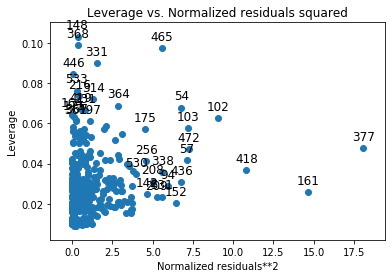

In [32]:
# Lets plot the normalized residual vs leverage
from statsmodels.graphics.regressionplots import plot_leverage_resid2
fig = plot_leverage_resid2(lm)

# Find outliers using the Bonferroni outlier test
test = lm.outlier_test()

print('Bad data points (bonf(p) < 0.05):')
print(test[test['bonf(p)'] < 0.05])

**Questions:**
1. Which observations were considered outliers and why?
2. Please explain why outliers should be removed from the training dataset?

**Answers:**

## Exercise 9: Homoscedasticity and normality
Residual should be scattered and not have any patterns (homoscedasticity) and the distribution of residual should be normal (normality). If the residual plot is not scattered or not normally distributed then there is a chance that independent variable is not having linear relationship and applying appropriate transformation to the independent variable will fix the issue.

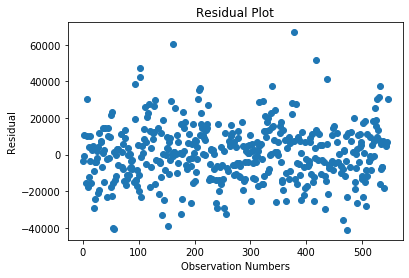

Text(0, 0.5, 'Observation Numbers')

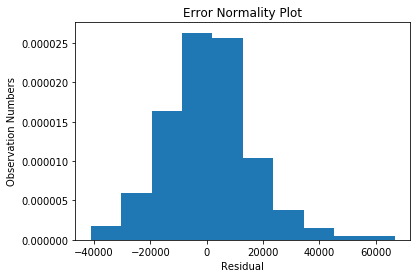

In [33]:
# Plot to check homoscedasticity
plt.plot(lm.resid,'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()

# Normality plot
plt.hist(lm.resid, density = True)
plt.title('Error Normality Plot')
plt.xlabel('Residual')
plt.ylabel('Observation Numbers')

**Question:**
1. In your opinion, are the assumptions regarding homoscedasticity and normality fulfilled? Justify your answer.

**Answer:**

## Exercise 10: Linearity plots
It is possible to check the influence of all the regressors (independent variables) on the dependent variable using the **plot_partregress_grid()** function.

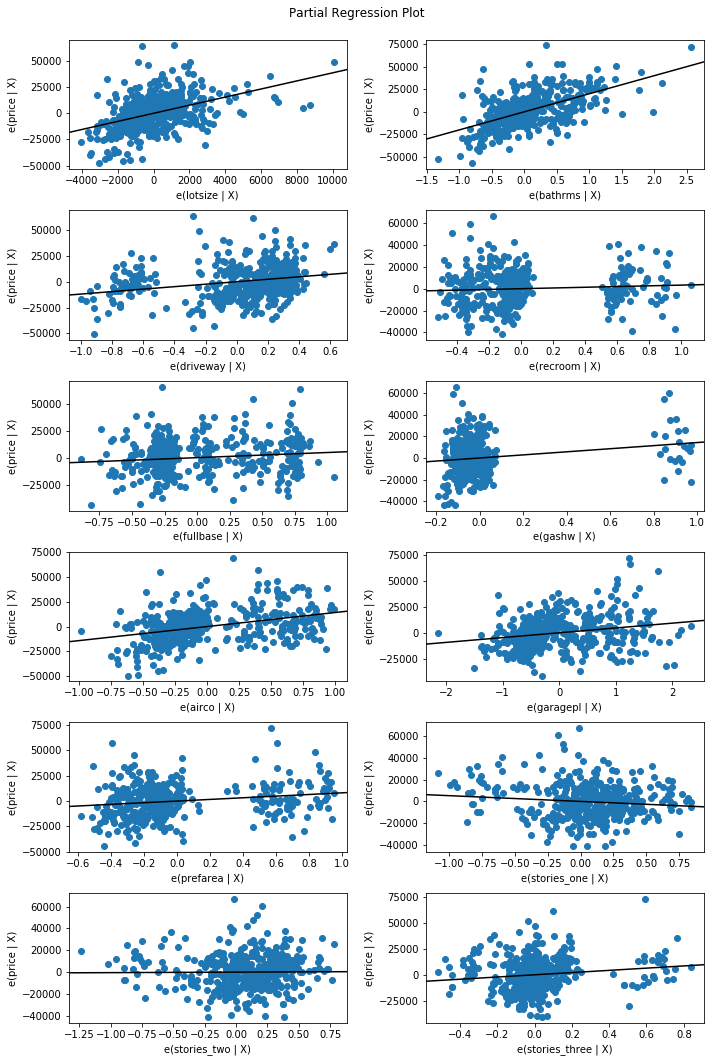

In [35]:
# Linearity plots
fig = plt.figure(figsize = (10, 15))
fig = sm.graphics.plot_partregress_grid(lm, fig = fig)

**Question:**
1. On the basis of the above partial regression plot, explain which variables do you think are the best and which are the worst for building a regression model? Justify your answer.

**Answer:**

## Exercise 11: Regularization
With an increase in number of variables, and increase in model complexity, the probability of over-fitting also increases. **Regularization** is a technique to avoid over-fitting problem. **Over-fitting** occurs when the model fits the data too well capturing all the noises. In this case we can notice a high accuracy in the training data set, whereas the same model will result a low accuracy on test data set. This means the model has fitted the line so well to the train data set that it failed to generalize it to fit well on unseen data set.

In [36]:
import warnings
warnings.filterwarnings('ignore')

from sklearn import linear_model

# Load data
df = pd.read_csv('Grade_Set_2.csv')
df.columns = ['x', 'y']

for i in range(2, 50):   # Power of 1 is already there
    colname = 'x_%d' % i  # New var will be x_power
    df[colname] = df['x'] ** i

independent_variables = list(df.columns)
independent_variables.remove('y')

X = df[independent_variables]    # Independent variable
y = df.y                         # Dependent variable 

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, random_state = 1)

# Ridge regression
lr = linear_model.Ridge(alpha = 0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('------ Ridge Regression ------')
print('Train MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print('Test MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('Ridge Coef:', lr.coef_)

# LASSO regression
lr = linear_model.Lasso(alpha = 0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print('\n----- LASSO Regression -----')
print('Train MAE:', metrics.mean_absolute_error(y_train, y_train_pred))
print('Train RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print('Test MAE:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Test RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print('LASSO Coef:', lr.coef_)

------ Ridge Regression ------
Train MAE: 12.775326528414379
Train RMSE: 16.72063936357992
Test MAE: 22.397943556789926
Test RMSE: 22.432642089791898
Ridge Coef: [ 1.01446487e-88  1.27690319e-87  1.41113660e-86  1.49319913e-85
  1.54589299e-84  1.58049535e-83  1.60336716e-82  1.61825366e-81
  1.62742313e-80  1.63228352e-79  1.63372709e-78  1.63232721e-77
  1.62845333e-76  1.62233965e-75  1.61412730e-74  1.60389073e-73
  1.59165478e-72  1.57740595e-71  1.56110004e-70  1.54266755e-69
  1.52201757e-68  1.49904080e-67  1.47361205e-66  1.44559243e-65
  1.41483164e-64  1.38117029e-63  1.34444272e-62  1.30448024e-61
  1.26111524e-60  1.21418622e-59  1.16354417e-58  1.10906042e-57
  1.05063662e-56  9.88217010e-56  9.21803842e-55  8.51476330e-54
  7.77414158e-53  6.99926407e-52  6.19487106e-51  5.36778815e-50
  4.52745955e-49  3.68659929e-48  2.86198522e-47  2.07542549e-46
  1.35493365e-45  7.36155358e-45  2.64098894e-44 -4.76790286e-45
  2.09597530e-46]

----- LASSO Regression -----
Train MAE:

**Question:**
1. Which regularization method has proved more effective in building a regression model? Justify your answer.

**Answer:**